Dùng Keras cho mô hình đơn giản

In [1]:
from keras.models import Sequential
from keras.layers import Dense

In [2]:
# Build the model.
model = Sequential([
  Dense(25, activation='relu', input_shape=(3,)),
  Dense(25, activation='relu'),
  Dense(1, activation='sigmoid'),
])

In [3]:
model = Sequential()
model.add(Dense(25, activation='relu',input_shape=(3,)))
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [4]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 25)                100       
_________________________________________________________________
dense_4 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 26        
Total params: 776
Trainable params: 776
Non-trainable params: 0
_________________________________________________________________


In [5]:
# Compile the model.
model.compile(
  optimizer='adam',
  loss='binary_crossentropy',
  metrics=['accuracy'],
)

In [6]:
import numpy as np
X=np.array([[0,0,1],[1,1,1],[1,0,1],[0,1,1]]) 
y=np.array([[0,1,1,0]]).T

In [7]:
H =model.fit(
  X,y,
  epochs=10,
  batch_size=4,
)

Epoch 1/10
1/1 [==============================] - 1s 521ms/step - loss: 0.6719 - accuracy: 0.5000
Epoch 2/10
1/1 [==============================] - 0s 3ms/step - loss: 0.6681 - accuracy: 0.5000
Epoch 3/10
1/1 [==============================] - 0s 2ms/step - loss: 0.6643 - accuracy: 0.5000
Epoch 4/10
1/1 [==============================] - 0s 3ms/step - loss: 0.6606 - accuracy: 0.5000
Epoch 5/10
1/1 [==============================] - 0s 3ms/step - loss: 0.6570 - accuracy: 0.5000
Epoch 6/10
1/1 [==============================] - 0s 3ms/step - loss: 0.6537 - accuracy: 0.5000
Epoch 7/10
1/1 [==============================] - 0s 3ms/step - loss: 0.6503 - accuracy: 0.5000
Epoch 8/10
1/1 [==============================] - 0s 3ms/step - loss: 0.6470 - accuracy: 0.5000
Epoch 9/10
1/1 [==============================] - 0s 3ms/step - loss: 0.6437 - accuracy: 0.5000
Epoch 10/10
1/1 [==============================] - 0s 3ms/step - loss: 0.6403 - accuracy: 0.5000


In [8]:
model.predict(X)

array([[0.51192856],
       [0.57224154],
       [0.5662284 ],
       [0.50506556]], dtype=float32)

In [9]:
model.evaluate(X,y)

1/1 [==============================] - 0s 140ms/step - loss: 0.6369 - accuracy: 0.5000


[0.6368938684463501, 0.5]

Lấy dữ liệu từ mnist. Có 2 tập train và test


In [10]:
print(H.history)

{'loss': [0.6718790531158447, 0.6681271195411682, 0.664344072341919, 0.6605762243270874, 0.6570177674293518, 0.6536632180213928, 0.6503252387046814, 0.6469898819923401, 0.6436559557914734, 0.6402854919433594], 'accuracy': [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]}


Có 60000 ảnh train và 10000 ảnh để test

Mạng có 1 lớp vào 784 nút, 2 lớp ẩn mỗi lớp 64 nút, 1 lớp ra 10 nút. Các hàm kích hoạt là relu và softmax

Huấn luyện mạng 

In [11]:
print(H.history.keys())

dict_keys(['loss', 'accuracy'])


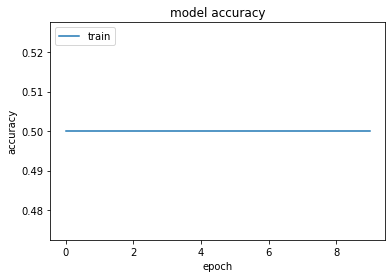

In [12]:
import matplotlib.pyplot as plt
plt.plot(H.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

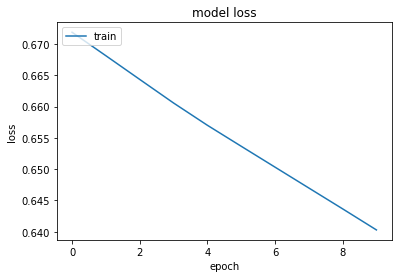

In [13]:
# summarize history for loss
plt.plot(H.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
model.save_weights('model.h5')

In [15]:
# Predict on the first 5 test images.
predictions = model.predict(test_images[:20])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

# Check our predictions against the ground truths.
print(test_labels[:20]) # [7, 2, 1, 0, 4]

NameError: name 'test_images' is not defined

Thử lấy model đã lưu trong model.h5 - không phải đào tạo lại

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# Build the model.
model = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])

# Load the model's saved weights.
model.load_weights('model.h5')

In [ ]:
#@tf.autograph.experimental.do_not_convert
# Predict on the first 5 test images.
predictions = model.predict(test_images[:50])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

# Check our predictions against the ground truths.
print(test_labels[:50]) # [7, 2, 1, 0, 4]

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4]
